# Sentiment Analysis Using BERT

- This notebook runs on Google Colab
- Using `ktrain` for modeling
  - The ktrain library is a lightweight wrapper for tf.keras in TensorFlow 2, which is "designed to make deep learning and AI more accessible and easier to apply for beginners and domain experts".
- Easy to implement BERT-like pre-trained language models
- This notebook works on sentiment analysis of Chinese movie reviews, which is a small dataset. I would like to see to what extent the transformers are effective when dealing with relatively smaller training set. This in turn shows us the powerful advantages of transfer learning. 

## Installing ktrain

In [1]:
!pip install ktrain


     |████████████████████████████████| 25.3MB 129kB/s 
     |████████████████████████████████| 983kB 48.9MB/s 
     |████████████████████████████████| 245kB 49.5MB/s 
     |████████████████████████████████| 1.1MB 49.2MB/s 
     |████████████████████████████████| 471kB 49.2MB/s 
     |████████████████████████████████| 1.1MB 49.9MB/s 
     |████████████████████████████████| 890kB 43.0MB/s 
     |████████████████████████████████| 3.0MB 45.9MB/s 
  Created wheel for ktrain: filename=ktrain-0.21.4-cp36-none-any.whl size=25270024 sha256=b5d94e83dd30dc5e0cee64f8d9c476a22db5eb7da93af886e3743f20c68b6869
  Stored in directory: /root/.cache/pip/wheels/e8/b6/c2/a730bb7727f9402827eb9cdd277a527a4a88acb2b0d22f06f0
  Created wheel for keras-bert: filename=keras_bert-0.86.0-cp36-none-any.whl size=34145 sha256=9ce5dfdb69ba2a17597d4aae36c73c2833fd192bf5584923776ea4db072b4d93
  Stored in directory: /root/.cache/pip/wheels/66/f0/b1/748128b58562fc9e31b907bb5e2ab6a35eb37695e83911236b
  Created wheel for lan

## Importing Libraries

In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
import ktrain
from ktrain import text
import tensorflow as tf

In [ ]:
tf.__version__

'2.3.0'

## Clone Git Repository for Data

In [ ]:
## Will need this if data is available on GitHub
# !git clone https://github.com/laxmimerit/IMDB-Movie-Reviews-Large-Dataset-50k.git

Cloning into 'IMDB-Movie-Reviews-Large-Dataset-50k'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


## Data Preparation

- Mount the Google Drive first (manually via the tabs on the left of Google Colab

- The default path of the input data csv file is:

```
GOOGLE_DRIVE_ROOT/ColabData/marc_movie_review_metadata.csv
```
- In BERT, there is no need to do word segmentation. The model takes in the raw reviews as the input.

In [221]:
## loading the train dataset
## change the path if necessary
data = pd.read_csv('/content/drive/My Drive/ColabData/marc_movie_review_metadata.csv', dtype= str)[['reviews','rating']]
data = data.rename(columns={'reviews':'Reviews', 'rating':'Sentiment'})
data.head()

,Reviews,Sentiment
0,唉，踩雷了，浪費時間，不推 唉，踩雷了，浪費時間，不推,negative
1,片長三個小時，只有最後半小時能看，前面真的鋪陳太久，我旁邊的都看到打呼,negative
2,史上之最，劇情拖太長，邊看邊想睡覺...... 1.浩克竟然學會跟旁人一起合照。 2.索爾...,negative
3,難看死ㄌ 難看死了 難看死ㄌ 看到睡著 拖戲拖很長 爛到爆,negative
4,連續三度睡著，真的演的太好睡了,negative


In [21]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.1)


In [22]:
## dimension of the dataset

print("Size of train dataset: ",data_train.shape)
print("Size of test dataset: ",data_test.shape)

#printing last rows of train dataset
data_train.tail()

#printing head rows of test dataset
data_test.head()

Size of train dataset:  (2880, 2)
Size of test dataset:  (320, 2)


,Reviews,Sentiment
2430,刻劃深刻的一部片，會讓人有心痛的感覺。亞瑟雖然有精神疾病，卻也希望用自己的方法帶來歡笑，可惜...,positive
1584,看過一次就夠了 如果不是做影評的 何必浪費錢 這就是一部刻意燒腦的電影 沒那麼偉大。,negative
769,給五星的是怎麼回事？純粹政治認同給的分數嗎？純粹以電影評論而已真的不好看，不合邏輯的地方太多...,negative
1631,雖然看似輕鬆詼諧劇情\r\n但深刻的撼動內心\r\n推薦給所有韓粉們,positive
2247,很刺激好看超爽！\r\n推薦去電影院看！,positive


## Train-Test Split

Models supported by transformers library for tensorflow 2:

- **BERT**: bert-base-uncased, bert-large-uncased,bert-base-multilingual-uncased, and others.
- **DistilBERT**: distilbert-base-uncased distilbert-base-multilingual-cased, distilbert-base-german-cased, and others
- **ALBERT**: albert-base-v2, albert-large-v2, and others
- **RoBERTa**: roberta-base, roberta-large, roberta-large-mnli
- **XLM**: xlm-mlm-xnli15–1024, xlm-mlm-100–1280, and others
- **XLNet**: xlnet-base-cased, xlnet-large-cased


In [25]:
# text.texts_from_df return two tuples
# maxlen means it is considering that much words and rest are getting trucated
# preprocess_mode means tokenizing, embedding and transformation of text corpus(here it is considering BERT model)


(X_train, y_train), (X_test, y_test), preproc = text.texts_from_df(train_df=data_train,
                                                                   text_column = 'Reviews',
                                                                   label_columns = 'Sentiment',
                                                                   val_df = data_test,
                                                                   maxlen = 250,
                                                                   lang = 'zh-*',
                                                                   preprocess_mode = 'bert') # or distilbert

downloading pretrained BERT model (chinese_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: zh-*


Is Multi-Label? False
preprocessing test...
language: zh-*


In [28]:
## size of data
print(X_train[0].shape, y_train.shape)
print(X_test[0].shape, y_test.shape)

(2880, 250) (2880, 2)
(320, 250) (320, 2)


## Define Model

In [29]:
## use 'distilbert' if you want
model = text.text_classifier(name = 'bert', # or distilbert
                             train_data = (X_train, y_train),
                             preproc = preproc)

Is Multi-Label? False
maxlen is 250
done.


## Define Learner

In [30]:
#here we have taken batch size as 6 as from the documentation it is recommend to use this with maxlen as 500
learner = ktrain.get_learner(model=model, train_data=(X_train, y_train),
                   val_data = (X_test, y_test),
                   batch_size = 6)

## Estimate Learning Rate (Optional)

- A nice artilce on how to interpret learning rate plots. See [Keras Learning Rate Finder](https://www.pyimagesearch.com/2019/08/05/keras-learning-rate-finder/).

simulating training for different learning rates... this may take a few moments...
Epoch 1/2
480/480 [==============================] - 234s 488ms/step - loss: 0.6287 - accuracy: 0.6681
Epoch 2/2
480/480 [==============================] - 235s 489ms/step - loss: 2.7506 - accuracy: 0.4878


done.
Visually inspect loss plot and select learning rate associated with falling loss


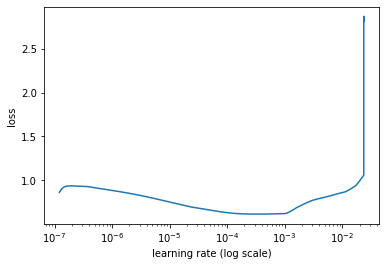

In [31]:
learner.lr_find(show_plot=True, max_epochs=2)

## Fit and Save Model

In [32]:
#Essentially fit is a very basic training loop, whereas fit one cycle uses the one cycle policy callback

learner.fit_onecycle(lr = 2e-5, epochs = 1)
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.save('/content/drive/My Drive/ColabData/bert-ch-marc')




begin training using onecycle policy with max lr of 2e-05...
480/480 [==============================] - 249s 520ms/step - loss: 0.3143 - accuracy: 0.8639 - val_loss: 0.1878 - val_accuracy: 0.9406


## Evaluation

In [47]:
y_pred=predictor.predict(data_test['Reviews'].values)

In [55]:
# classification report

from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred))


              precision    recall  f1-score   support

    negative       0.92      0.95      0.94       145
    positive       0.96      0.93      0.94       175

    accuracy                           0.94       320
   macro avg       0.94      0.94      0.94       320
weighted avg       0.94      0.94      0.94       320



In [48]:
y_true = data_test['Sentiment'].values
# Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, y_pred)

array([[138,   7],
       [ 12, 163]])

In [49]:
# Accuracy
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.940625

In [50]:
# Recall
from sklearn.metrics import recall_score
recall_score(y_true, y_pred, average=None)

array([0.95172414, 0.93142857])

In [ ]:
# Precision
from sklearn.metrics import precision_score
precision_score(y_true, y_pred, average=None)

In [ ]:
# F1
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)


In [202]:
## AUC-ROC Curve
y_pred_proba = predictor.predict(data_test['Reviews'].values, return_proba=True)
print(predictor.get_classes()) # probability of each class
print(y_pred_proba[:5,])

['negative', 'positive']
[[0.00750571 0.9924942 ]
 [0.97774005 0.02225988]
 [0.97982943 0.02017057]
 [0.00750882 0.9924912 ]
 [0.00296137 0.9970386 ]]


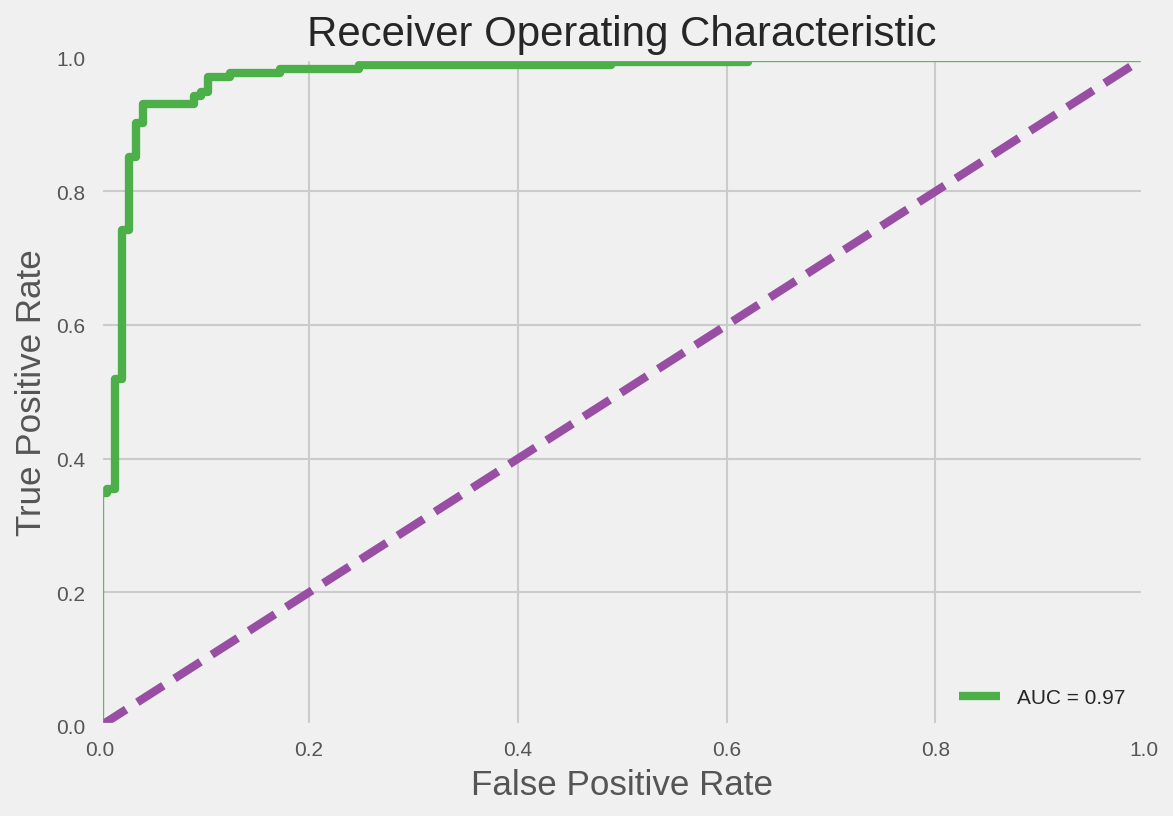

In [208]:
y_true_binary = [1 if label=='positive' else 0 for label in y_true]
y_pred_proba_positive = y_pred_proba[:,1]
y_pred_proba_negative = y_pred_proba[:,0]
import numpy as np
from sklearn import metrics
from sklearn.metrics import roc_auc_score
# y_true = np.array([0, 0, 1, 1])
# y_scores = np.array([0.1, 0.4, 0.35, 0.8])
roc_auc_score(y_true_binary, y_pred_proba_positive)


# import sklearn.metrics as metrics
# # calculate the fpr and tpr for all thresholds of the classification
# probs = model.predict_proba(X_test)
# preds = probs[:,1] # 
fpr, tpr, threshold = metrics.roc_curve(y_true_binary, y_pred_proba_positive)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
palette = plt.get_cmap('Set1')
print(palette)
plt.figure(dpi=150)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc, color=palette(2))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--', color=palette(3))
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


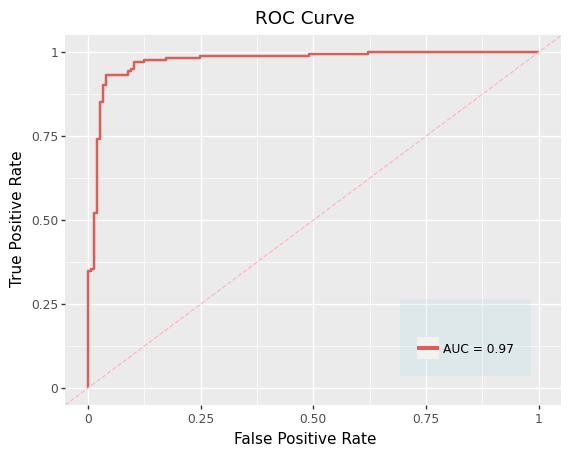

<ggplot: (-9223363245528407871)>

In [219]:
# ## ggplot2 version
# ## prettier?


## Add label for color aesthetic setting
f = pd.DataFrame(dict(fpr = fpr, tpr = tpr))
f['label']= ['X' for i in range(f.shape[0])]


from plotnine import *

g = (
    ggplot(f, aes('fpr', 'tpr', color='label'))
    + geom_line( size=1)
    + geom_abline(linetype='dashed', color="lightpink")
    + labs(x = 'False Positive Rate', 
           y = 'True Positive Rate',
           title="ROC Curve")
    + scale_color_discrete(labels=['AUC = %0.2f' % roc_auc],name = ' ')
    + theme(legend_position = (.75,.25),
            legend_background = element_rect(fill='lightblue', 
                                             alpha=0.2,
                                             size=0.5, linetype="solid",
                                             colour = None)))
g


In [220]:
# g.save('/content/drive/My Drive/ColabData/ggplot-roc.png', width=12, height=10, dpi=300)

## Prediction and Deployment

In [224]:
#sample dataset to test on

data = ['前面好笑看到後面真的很好哭！推薦！',
        '也太浪費錢了，劇情普普，新鮮度可以再加強',
        '人生一定要走一遭電影院',
        '不推',
        '帶六歲孩子看，大人覺得小孩看可以，小孩也覺得好看',
        '我想看兩人如何化解對方的防線，成為彼此的救贖；在人生旅途中，留下最深刻的回憶。',
        '這部新恐龍是有史以來最好看的哆啦電影版，50週年紀念作當之無愧，真的太感人了，並且彩蛋多到數不完，這部電影不僅講述了勇氣、友誼與努力不懈的精神，也以大雄的視角來看父母的心情，不管是劇情、畫面都是一流，另外配樂非常到位，全程都不會無聊，非常推薦大人、小孩、父母去電影院看，絕對值得。',
        '看完之後覺得新不如舊，還是大雄的恐龍好看，不管是劇情還是做畫，都是大雄的恐龍好，而且大雄的新恐龍做畫有點崩壞，是有沒有好好審查啊!以一部50周年慶的電影來說有點丟臉，自從藤子不二雄過世後，哆啦A夢的電影就一直表現平平，沒有以前的那份感動。']


In [225]:
predictor.predict(data)

['positive',
 'negative',
 'positive',
 'negative',
 'positive',
 'positive',
 'positive',
 'negative']

In [226]:
#return_proba = True means it will give the prediction probabilty for each class

predictor.predict(data, return_proba=True)

array([[0.00433748, 0.9956625 ],
       [0.98725605, 0.01274392],
       [0.27484193, 0.72515804],
       [0.9657716 , 0.0342284 ],
       [0.43184906, 0.56815094],
       [0.00549422, 0.9945057 ],
       [0.00446275, 0.9955373 ],
       [0.96282476, 0.03717517]], dtype=float32)

In [227]:
#classes available

predictor.get_classes()

['negative', 'positive']

In [ ]:
## zip for furture deployment
# !zip -r /content/bert.zip /content/bert

## Deploy Model

In [37]:
# #loading the model

predictor_load = ktrain.load_predictor('/content/drive/My Drive/ColabData/bert-ch-marc')

In [39]:
# #predicting the data

predictor_load.predict(data)

['positive', 'negative', 'positive']

## References

- [`ktrain` module](https://github.com/amaiya/ktrain)
- [Sentiment Classification Using Bert](https://kgptalkie.com/sentiment-classification-using-bert/)
- [當Bert遇上Keras：這可能是Bert最簡單的打開姿勢](http://www.ipshop.xyz/15376.html)
- [進擊的 BERT：NLP 界的巨人之力與遷移學習](https://leemeng.tw/attack_on_bert_transfer_learning_in_nlp.html)
- [Text Classification with Hugging Face Transformers in TensorFlow 2 (Without Tears)](https://towardsdatascience.com/text-classification-with-hugging-face-transformers-in-tensorflow-2-without-tears-ee50e4f3e7ed)
- [Huggingface Transformers](https://github.com/huggingface/transformers)
- [Huggingface Pre-trained Models](https://huggingface.co/transformers/pretrained_models.html)